In [2]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *

In [33]:
categories = ['insurance_validity','fuel_type','transmission','manufacturing_year','seats']

origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/회귀분석세미프로젝트/mana_2007-9제거.xlsx',categories=categories,info=True)
my_pretty_table(origin.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          808 non-null    int64   
 1   kms_driven          808 non-null    int64   
 2   mileage(kmpl)       808 non-null    float64 
 3   engine(cc)          808 non-null    int64   
 4   torque(Nm)          808 non-null    int64   
 5   price               808 non-null    float64 
 6   insurance_validity  808 non-null    category
 7   fuel_type           808 non-null    category
 8   seats               808 non-null    category
 9   transmission        808 non-null    category
 10  manufacturing_year  808 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 43.3 KB
None

데이터프레임 상위 5개 행
+----+--------------+--------------+-----------------+--------------+--------------+---------+-----------------------+-------------+---------+----------------+-

In [34]:
df = origin.copy()
df2 = df[df['manufacturing_year'] != 2010]


In [14]:
for c in categories:
    my_pretty_table(DataFrame(df2[c].value_counts(), columns=[c]))

+-----------------------+----------------------+
|                       |   insurance_validity |
|-----------------------+----------------------|
| Comprehensive         |                  589 |
| Third Party insurance |                  144 |
| Third Party           |                   38 |
| Zero Dep              |                   30 |
+-----------------------+----------------------+
+--------+-------------+
|        |   fuel_type |
|--------+-------------|
| Petrol |         554 |
| Diesel |         239 |
| CNG    |           8 |
+--------+-------------+
+-----------+----------------+
|           |   transmission |
|-----------+----------------|
| Manual    |            522 |
| Automatic |            279 |
+-----------+----------------+
+------+----------------------+
|      |   manufacturing_year |
|------+----------------------|
| 2018 |                  146 |
| 2017 |                  111 |
| 2019 |                  103 |
| 2016 |                   85 |
| 2015 |               

In [17]:
ignore = ['Unnamed: 0']
df2 = df2.drop(ignore,axis=1)
df2.columns


Index(['kms_driven', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)', 'price',
       'transmission', 'manufacturing_year'],
      dtype='object')

In [18]:
df2.head()

,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price,transmission,manufacturing_year
0,30615,17.40,999,9863,2.196113,Automatic,2020
1,24000,20.68,1995,188,3.167583,Automatic,2018
2,18378,16.50,1353,13808,2.607124,Manual,2019
3,44900,14.67,1798,17746,3.178054,Automatic,2019
4,42000,18.70,1199,887,1.695616,Manual,2017


In [24]:
df_lin = df2[['kms_driven','mileage(kmpl)','engine(cc)','torque(Nm)','price','manufacturing_year','transmission']]
df_lin.head()


,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price,manufacturing_year,transmission
0,30615,17.40,999,9863,2.196113,2020,Automatic
1,24000,20.68,1995,188,3.167583,2018,Automatic
2,18378,16.50,1353,13808,2.607124,2019,Manual
3,44900,14.67,1798,17746,3.178054,2019,Automatic
4,42000,18.70,1199,887,1.695616,2017,Manual


In [25]:
# 정규화
std_df = my_standard_scaler(df_lin, yname='price')
my_pretty_table(std_df.head())

+----+--------------+-----------------+--------------+--------------+----------------------+----------------+---------+
|    |   kms_driven |   mileage(kmpl) |   engine(cc) |   torque(Nm) |   manufacturing_year | transmission   |   price |
|----+--------------+-----------------+--------------+--------------+----------------------+----------------+---------|
|  0 |    -0.853107 |       -0.507913 |     -1.11655 |     0.880442 |                 2020 | Automatic      | 2.19611 |
|  1 |     -1.10024 |        0.488867 |      1.41998 |    -0.954057 |                 2018 | Automatic      | 3.16758 |
|  2 |     -1.31028 |        -0.78142 |    -0.215011 |      1.62846 |                 2019 | Manual         | 2.60712 |
|  3 |    -0.319425 |        -1.33755 |     0.918275 |      2.37515 |                 2019 | Automatic      | 3.17805 |
|  4 |    -0.427768 |       -0.112848 |    -0.607205 |    -0.821518 |                 2017 | Manual         | 1.69562 |
+----+--------------+-----------------+-

In [26]:
# 더미변수 추가
dummy_df = my_dummies(std_df)
my_pretty_table(dummy_df.head())
dummy_df.shape

+----+--------------+-----------------+--------------+--------------+---------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+-----------------------+
|    |   kms_driven |   mileage(kmpl) |   engine(cc) |   torque(Nm) |   price |   manufacturing_year_2011 |   manufacturing_year_2012 |   manufacturing_year_2013 |   manufacturing_year_2014 |   manufacturing_year_2015 |   manufacturing_year_2016 |   manufacturing_year_2017 |   manufacturing_year_2018 |   manufacturing_year_2019 |   manufacturing_year_2020 |   manufacturing_year_2021 |   manufacturing_year_2022 |   manufacturing_year_2023 |   transmission_Manual |
|----+--------------+-----------------+--------------+----------

(801, 19)

In [27]:
# 데이터 분리
x_train, x_test, y_train, y_test = my_train_test_split(dummy_df, yname='price',test_size=0.2 )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((640, 18), (640,), (161, 18), (161,))

In [28]:
my_linear_regrassion(x_train, y_train, x_test, y_test,use_plot=False,resid_test=False)

[회귀식]
price = -0.029 * kms_driven + 0.006 * mileage(kmpl) + 0.324 * engine(cc) + 0.055 * torque(Nm) + -0.763 * manufacturing_year_2011 + -0.419 * manufacturing_year_2012 + -0.279 * manufacturing_year_2013 + -0.271 * manufacturing_year_2014 + -0.096 * manufacturing_year_2015 + -0.037 * manufacturing_year_2016 + 0.135 * manufacturing_year_2017 + 0.190 * manufacturing_year_2018 + 0.254 * manufacturing_year_2019 + 0.319 * manufacturing_year_2020 + 0.368 * manufacturing_year_2021 + 0.491 * manufacturing_year_2022 + 0.108 * manufacturing_year_2023 + -0.302 * transmission_Manual + 2.061

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+--------------

LinearRegression(n_jobs=-1)

[회귀식]
price = 0.318 * engine(cc) + -0.841 * manufacturing_year_2011 + -0.476 * manufacturing_year_2012 + -0.305 * manufacturing_year_2013 + -0.301 * manufacturing_year_2014 + -0.125 * manufacturing_year_2015 + -0.061 * manufacturing_year_2016 + 0.107 * manufacturing_year_2017 + 0.185 * manufacturing_year_2018 + 0.263 * manufacturing_year_2019 + 0.363 * manufacturing_year_2020 + 0.436 * manufacturing_year_2021 + 0.565 * manufacturing_year_2022 + 0.190 * manufacturing_year_2023 + -0.316 * transmission_Manual + 2.073

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.750706 |            0.228156 |          

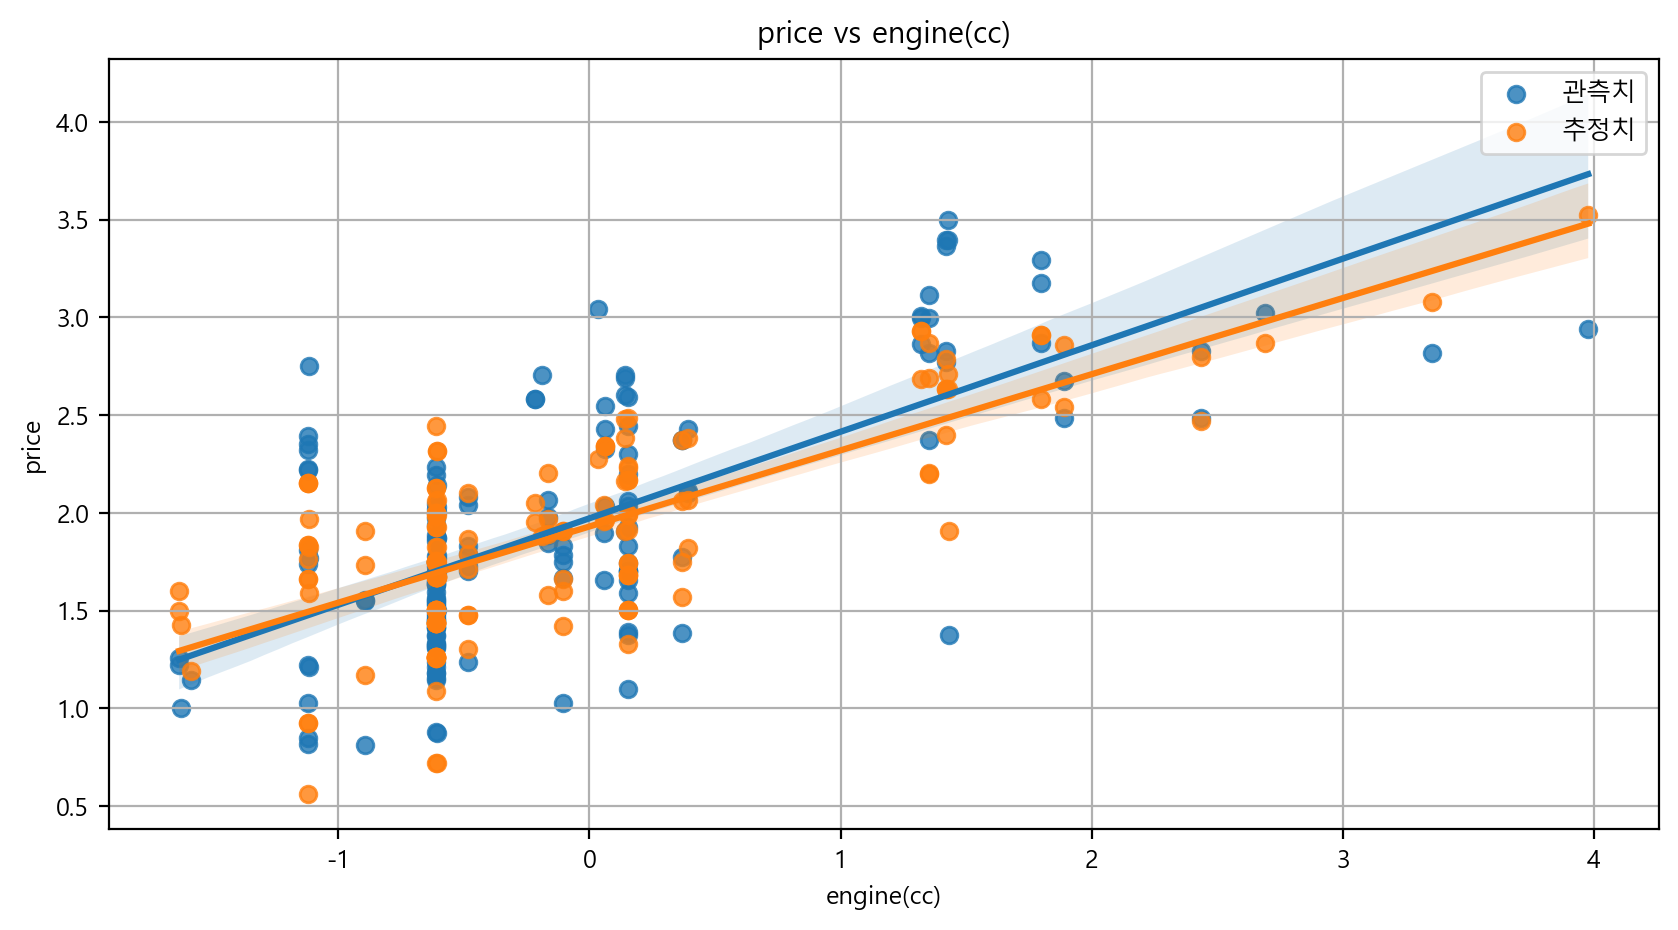

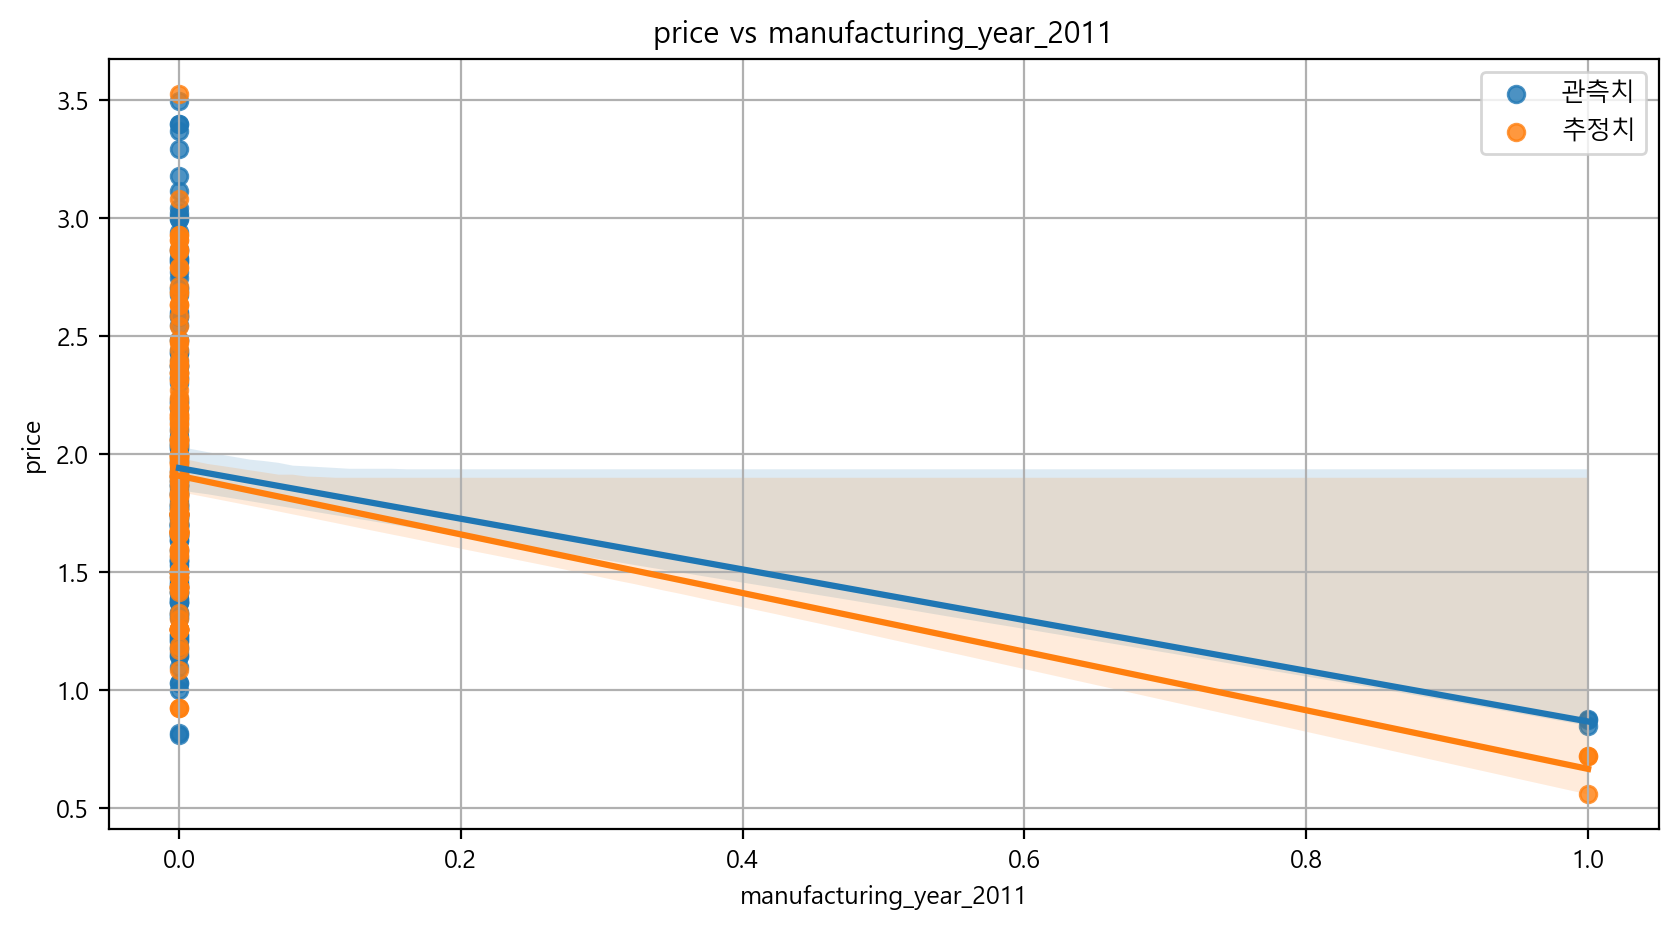

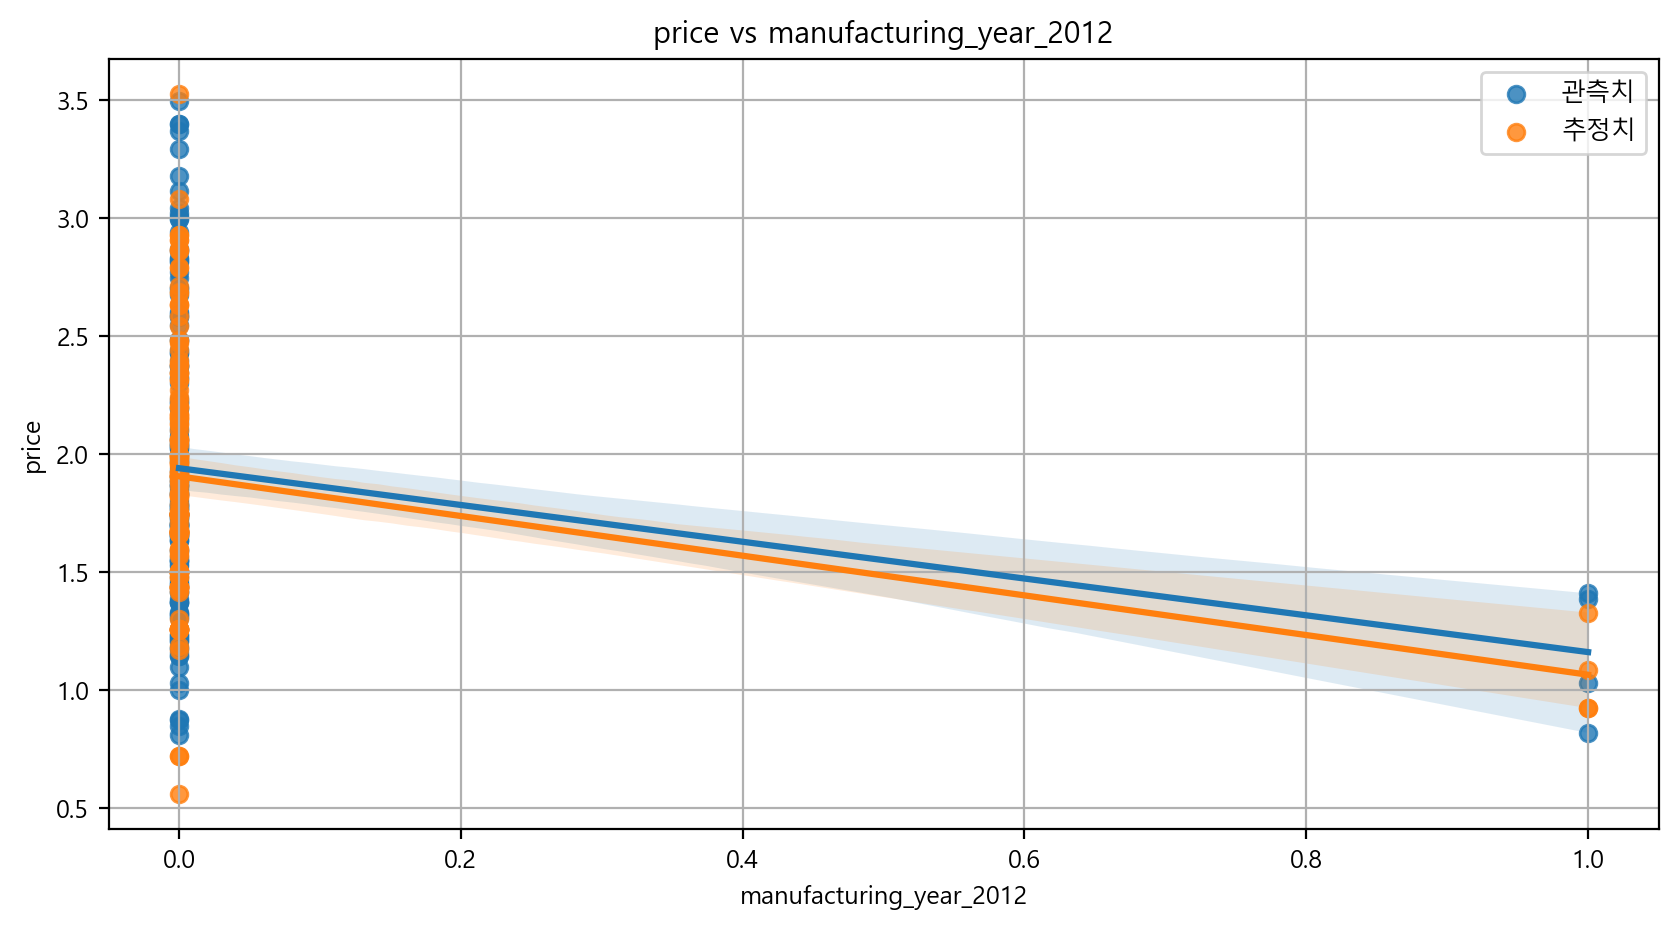

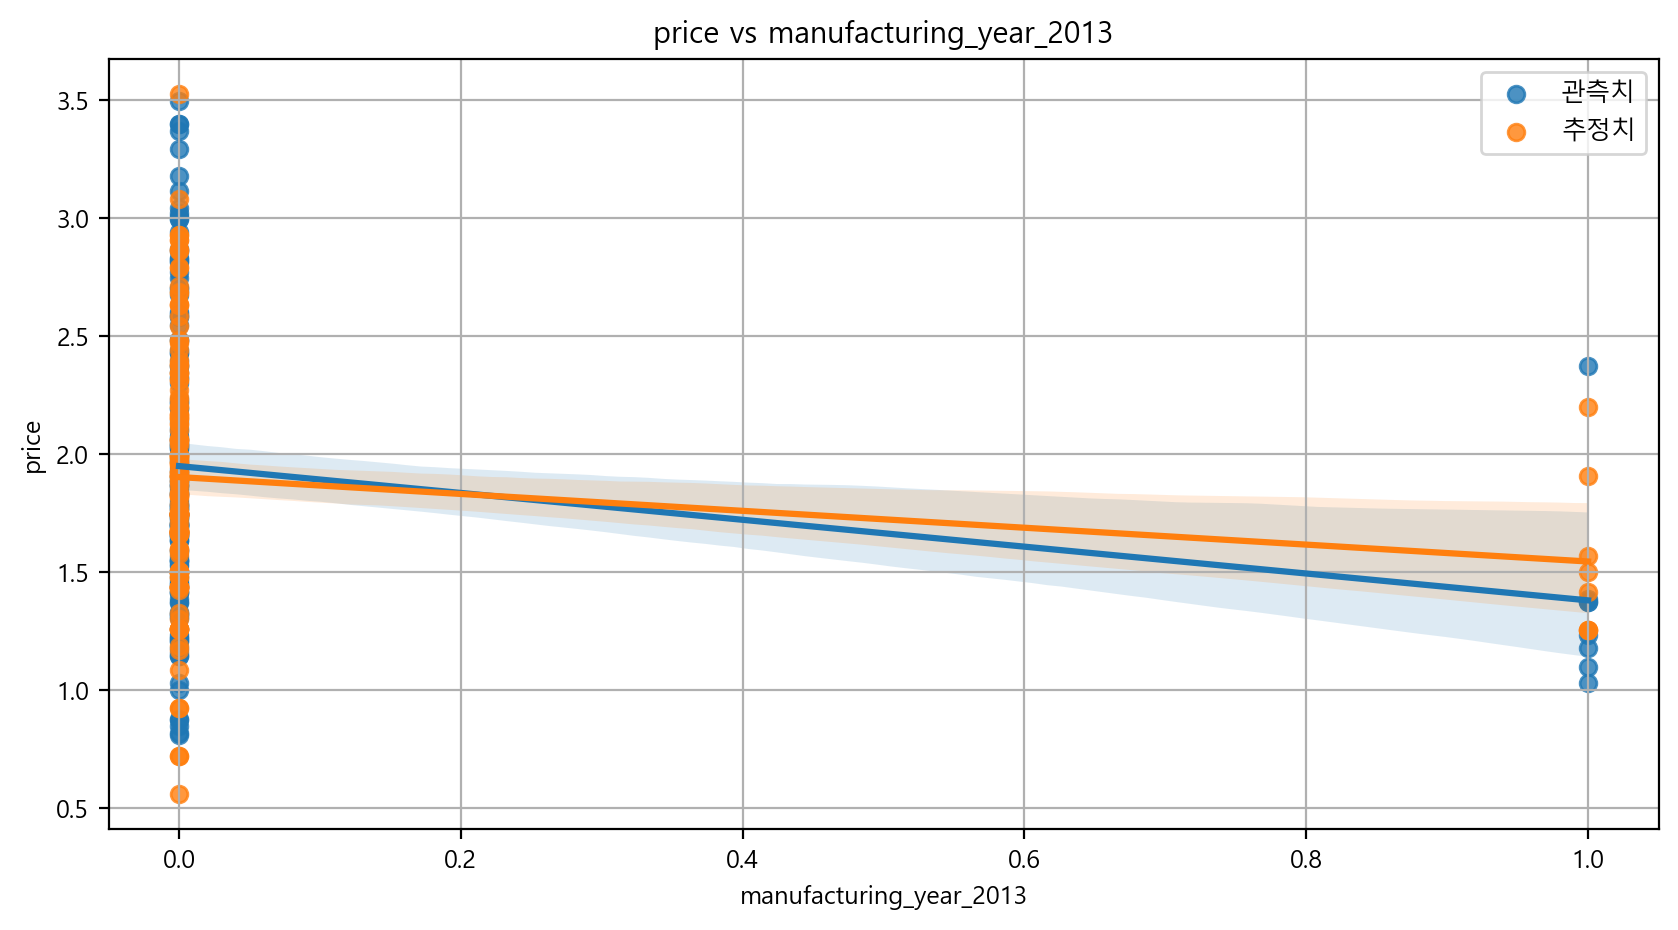

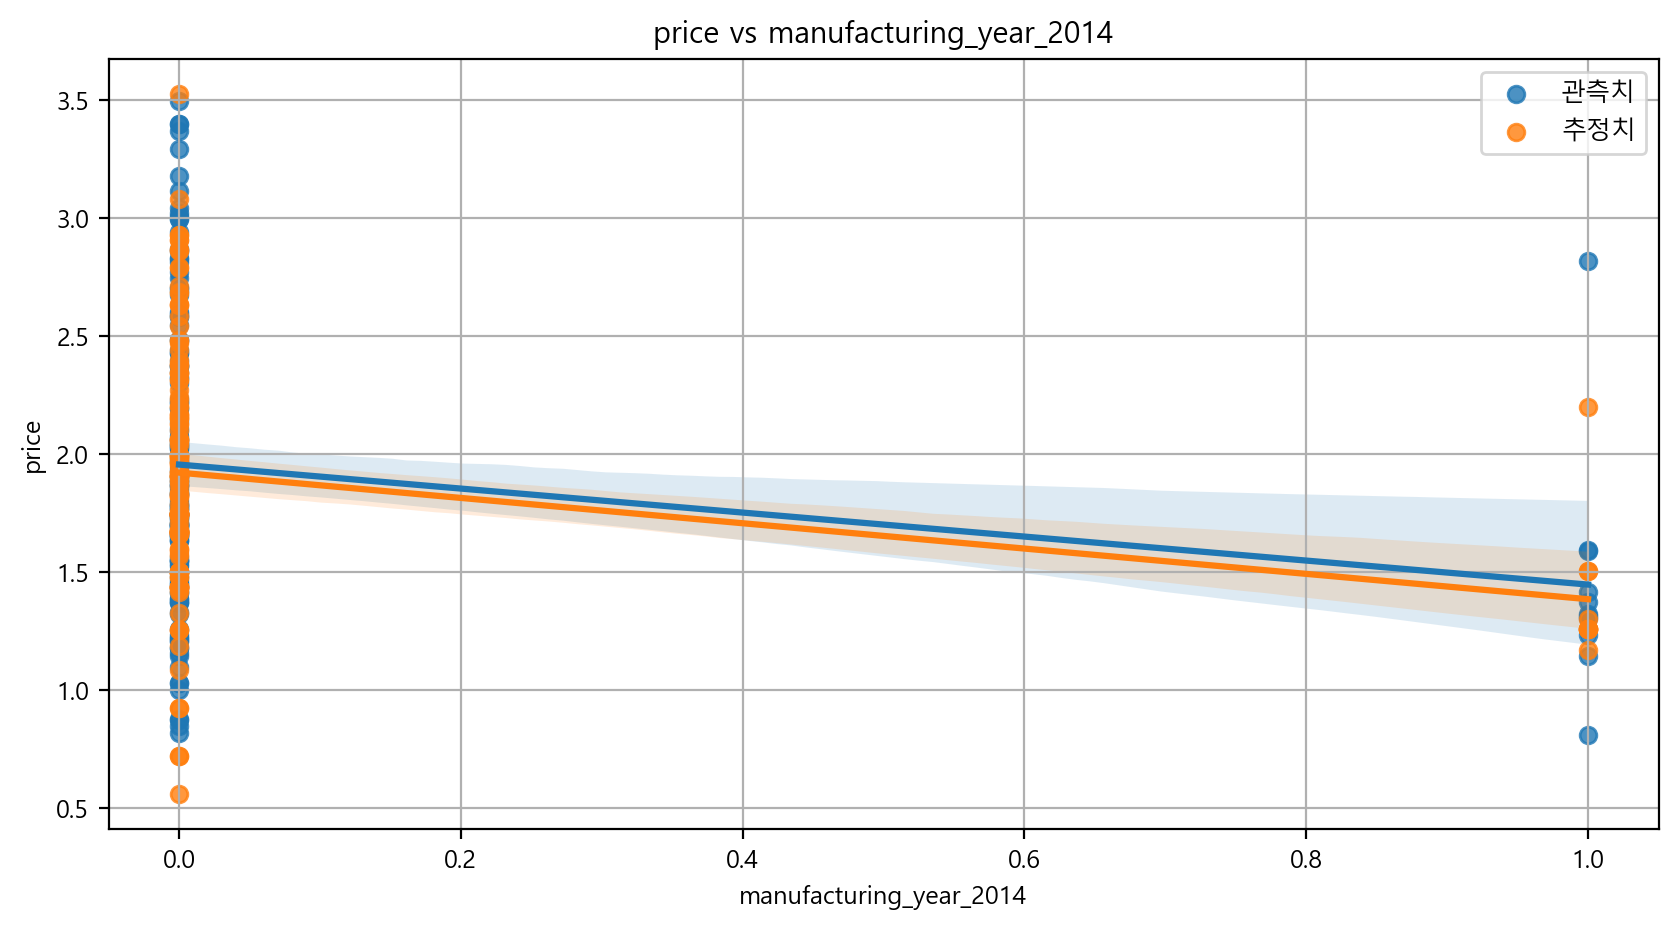

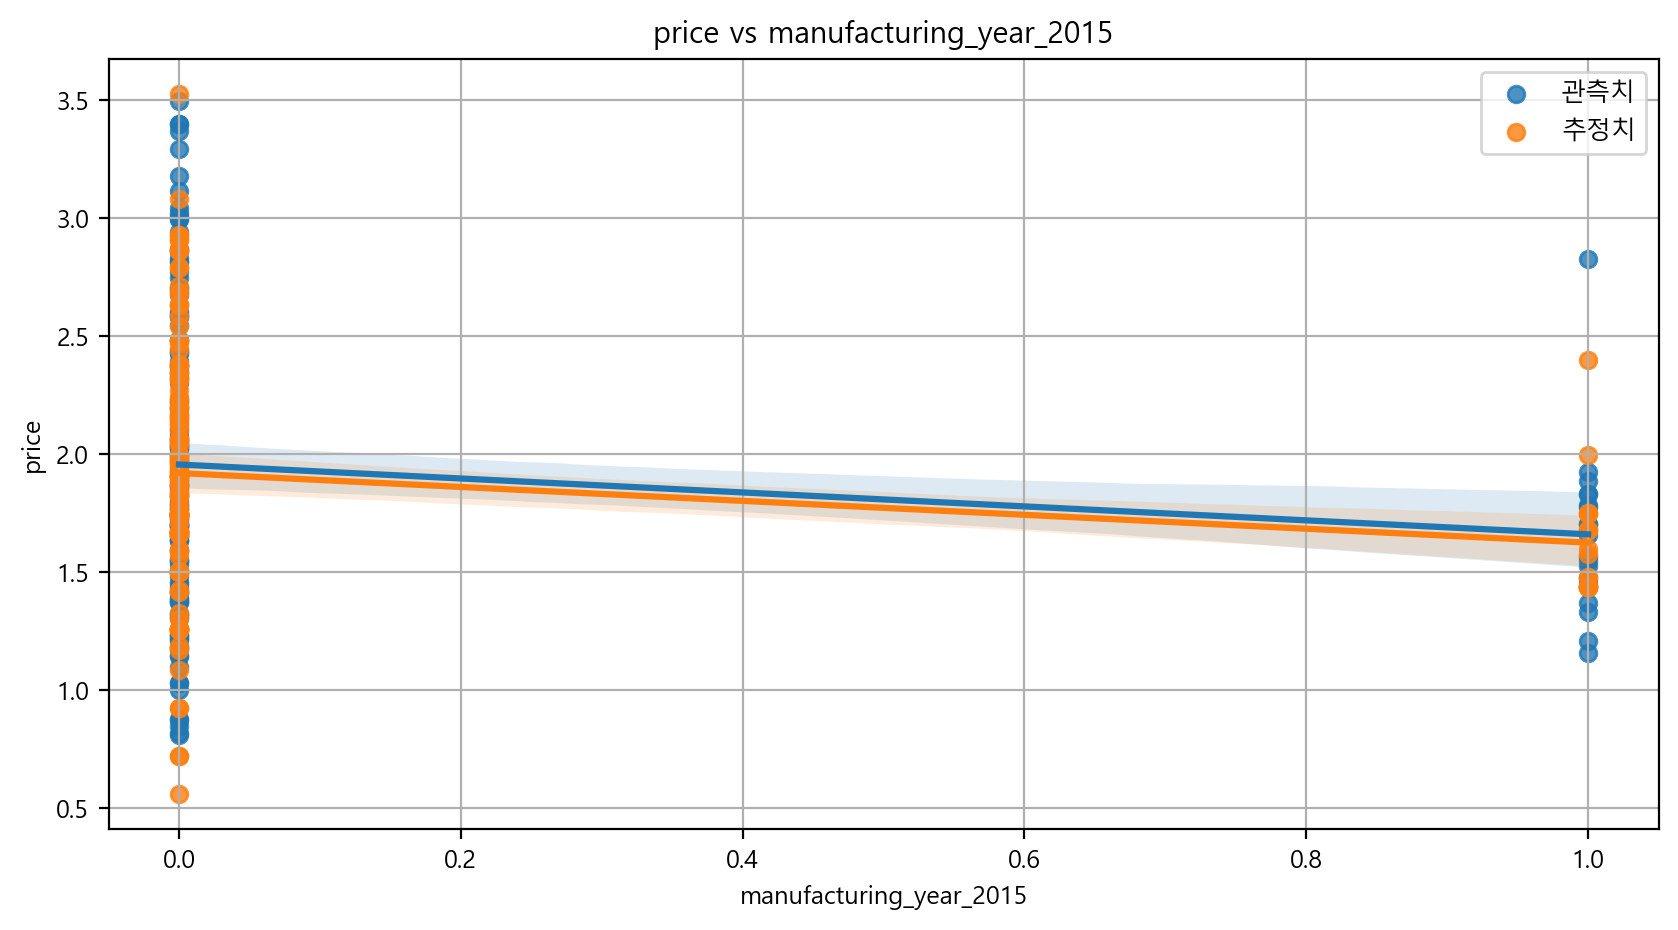

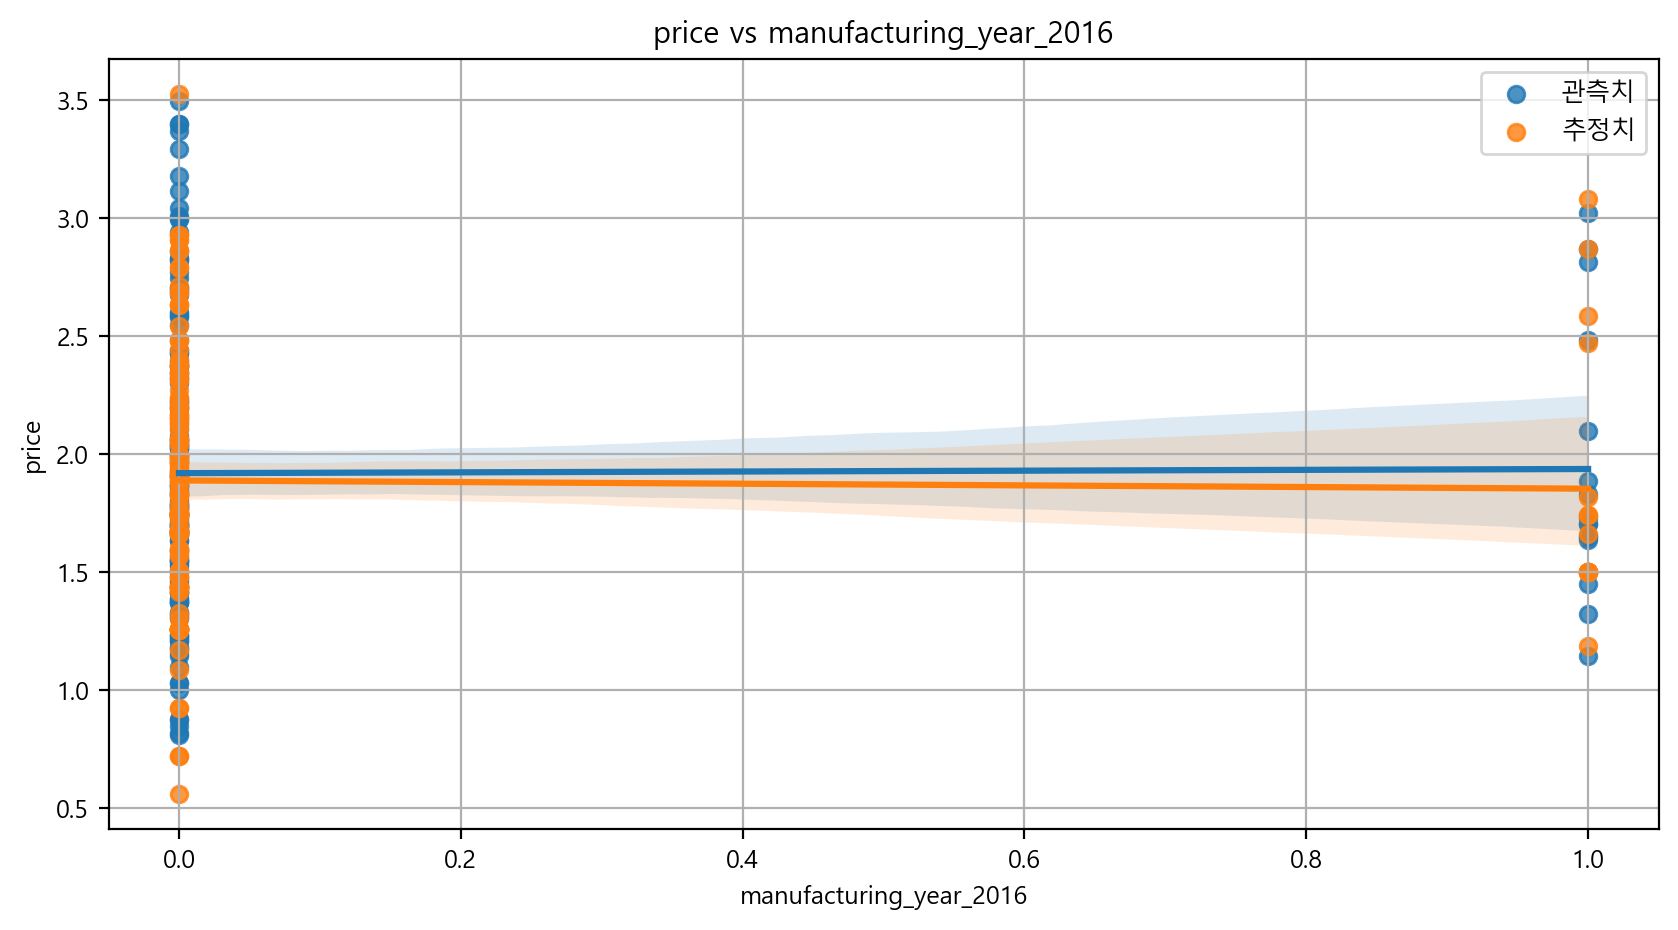

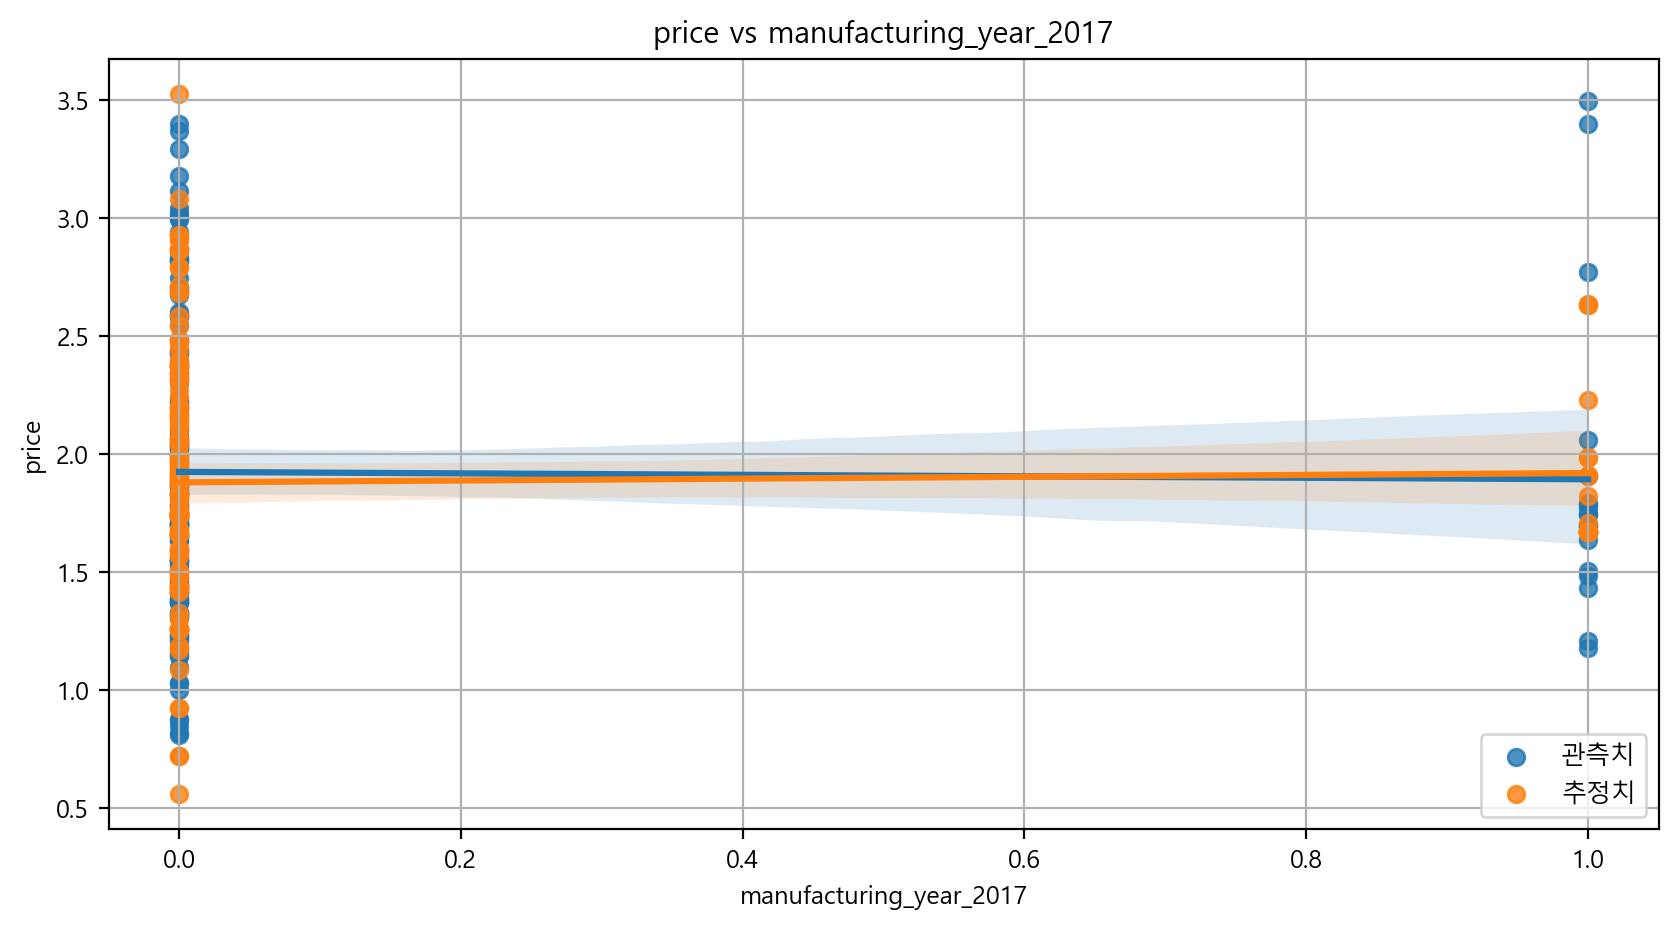

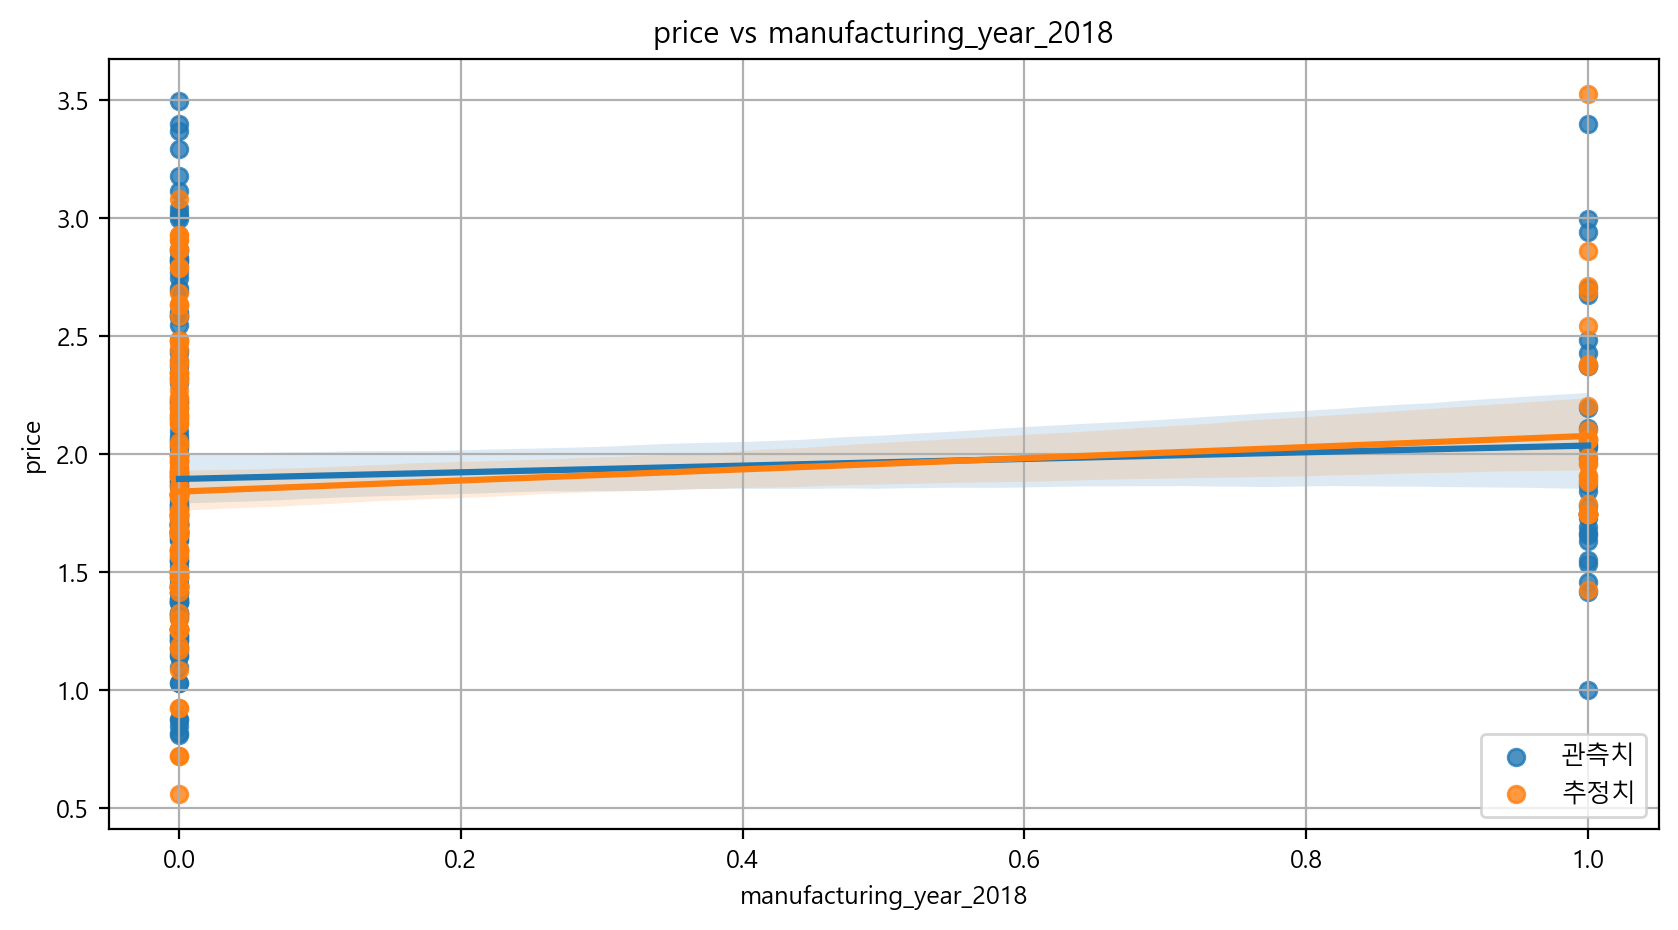

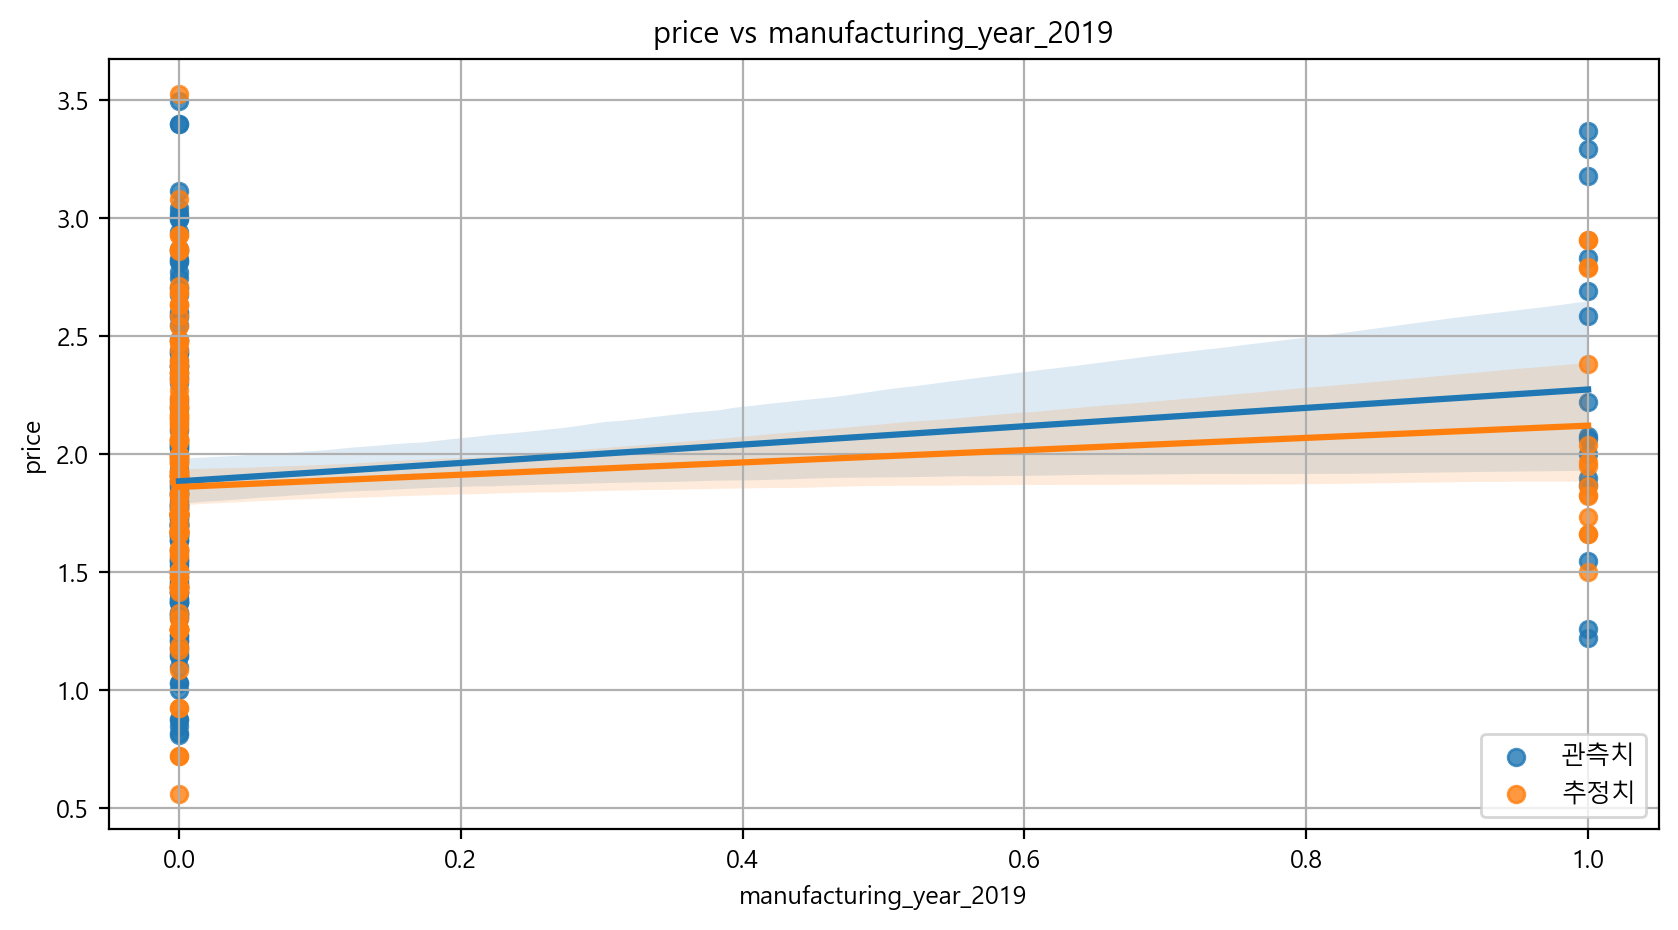

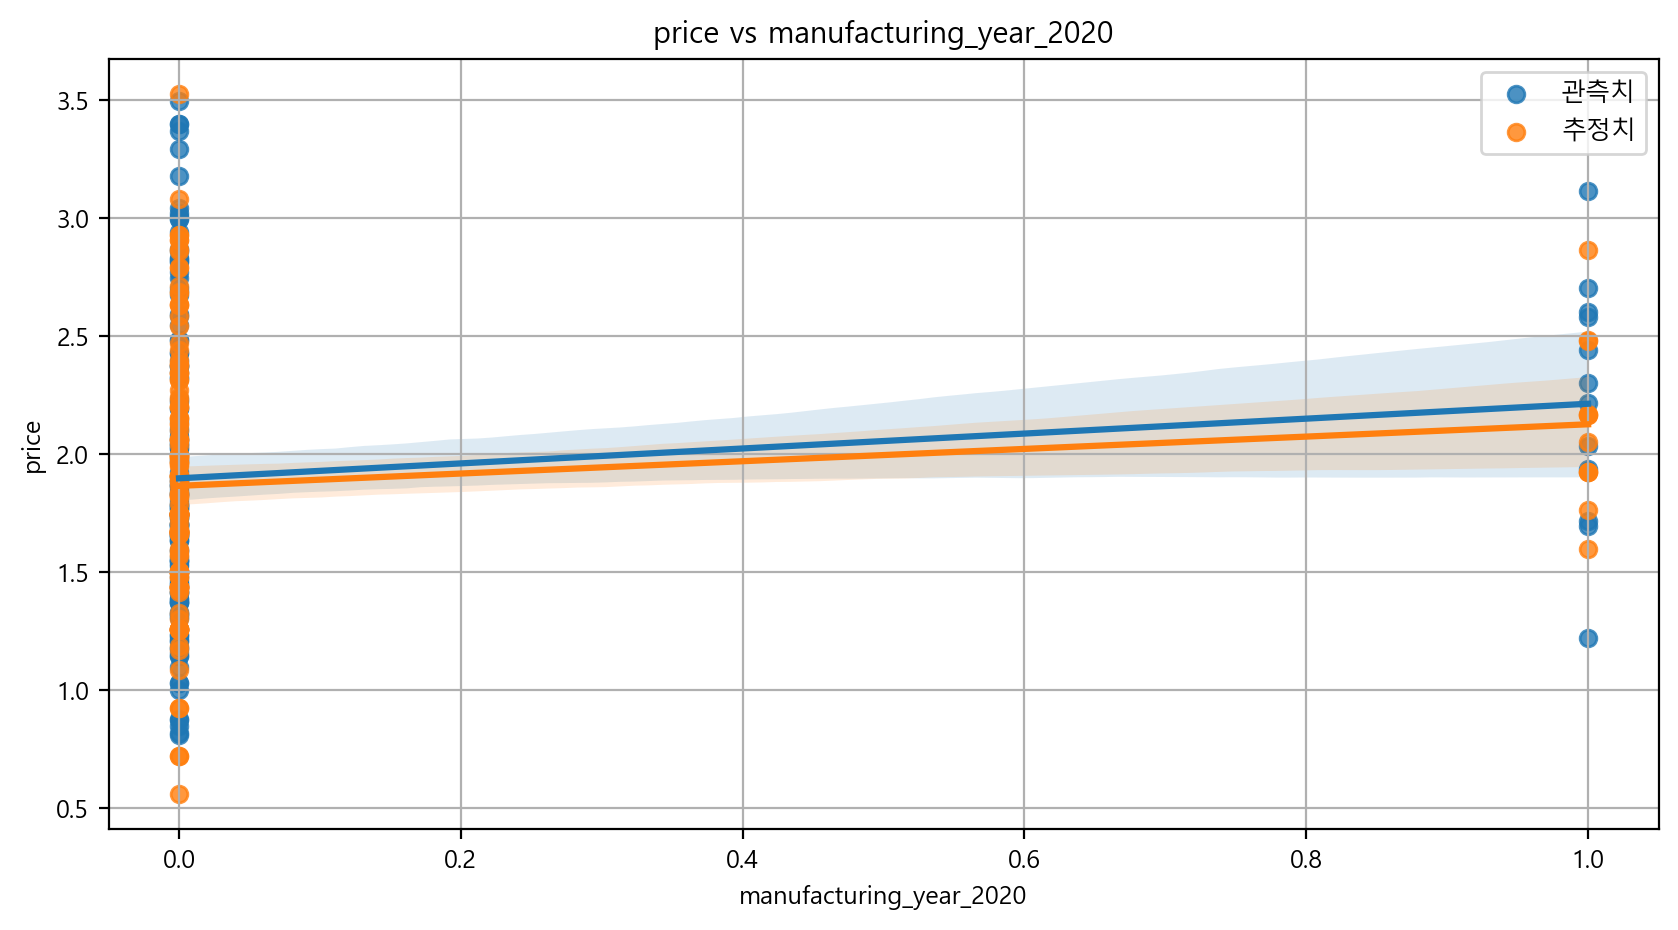

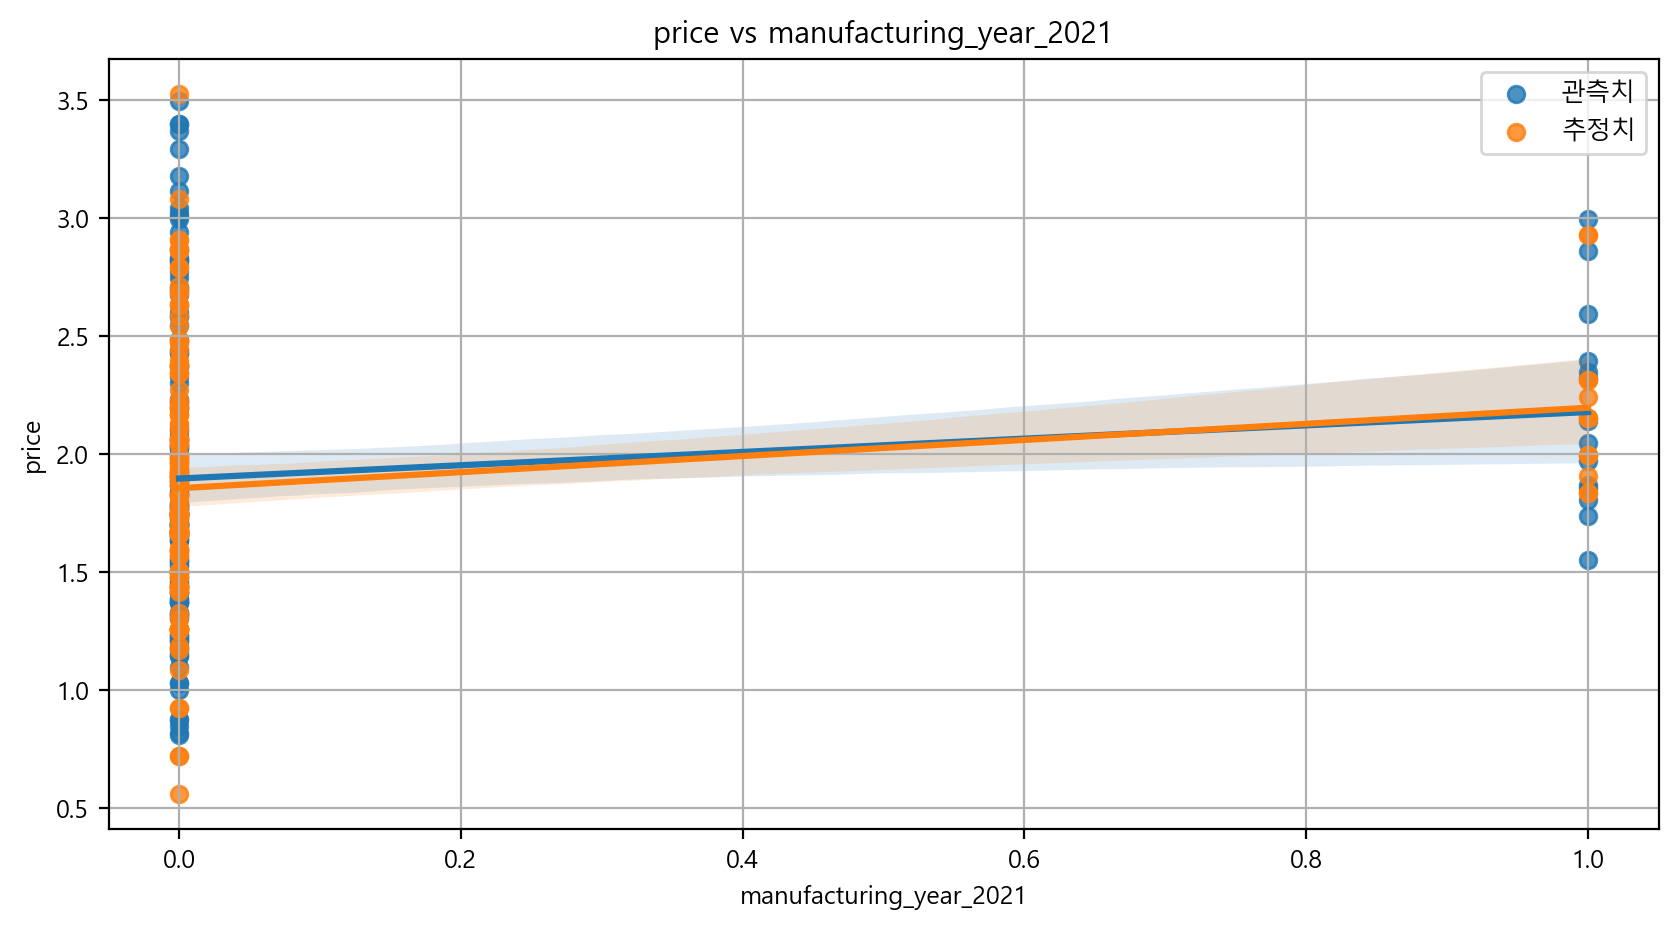

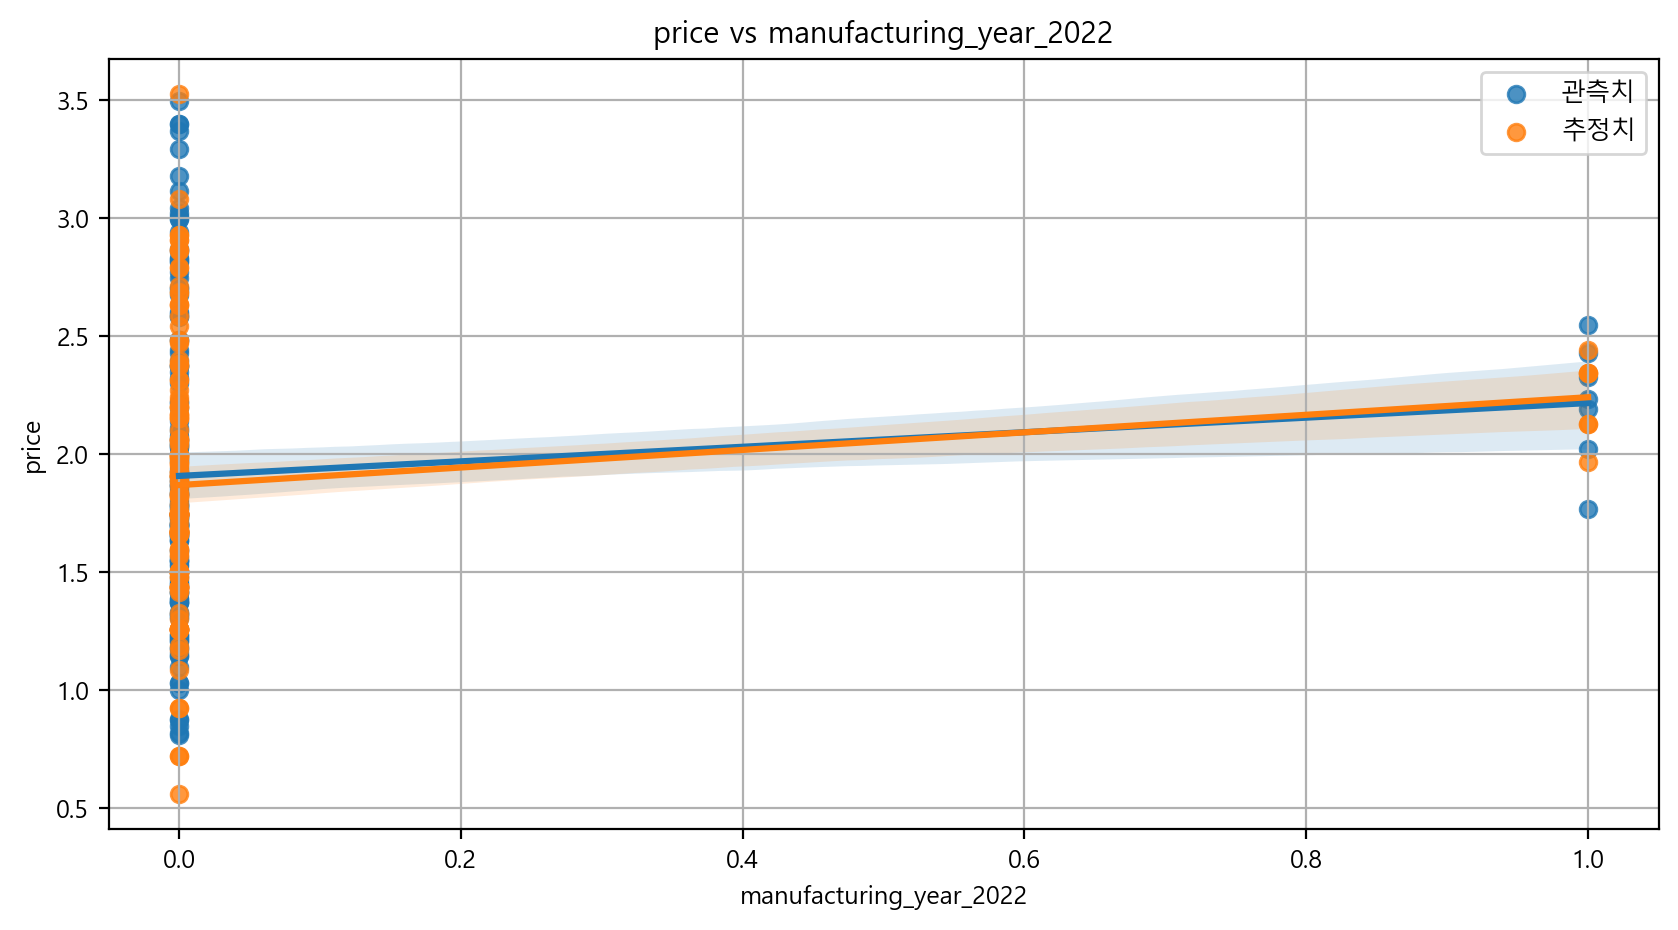

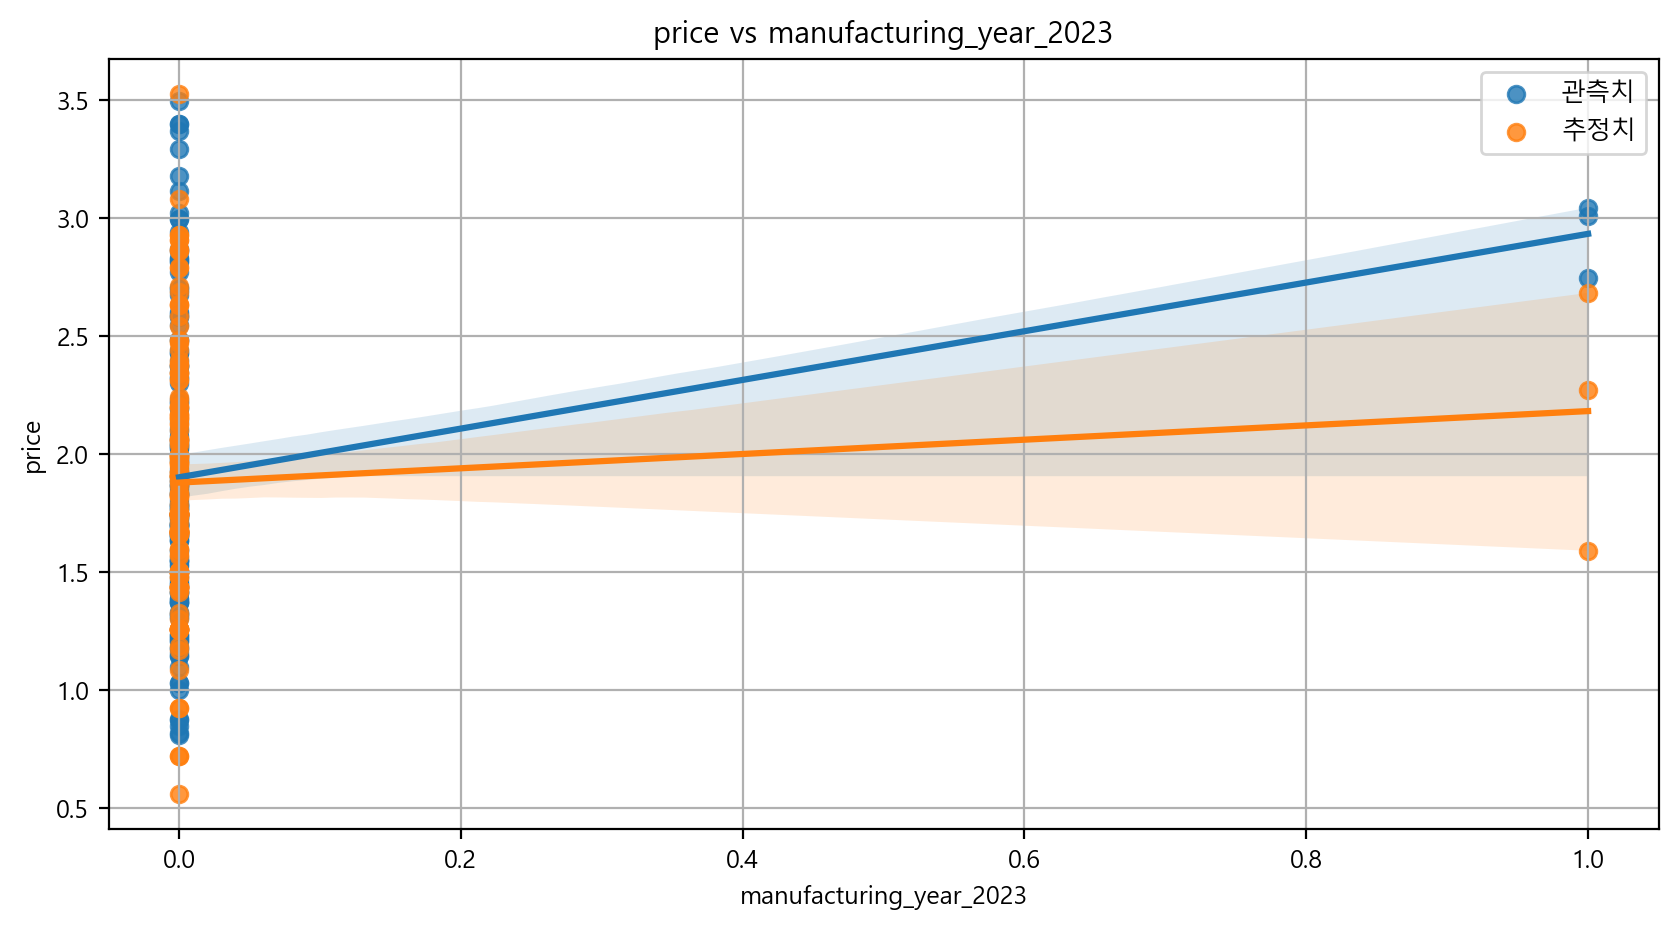

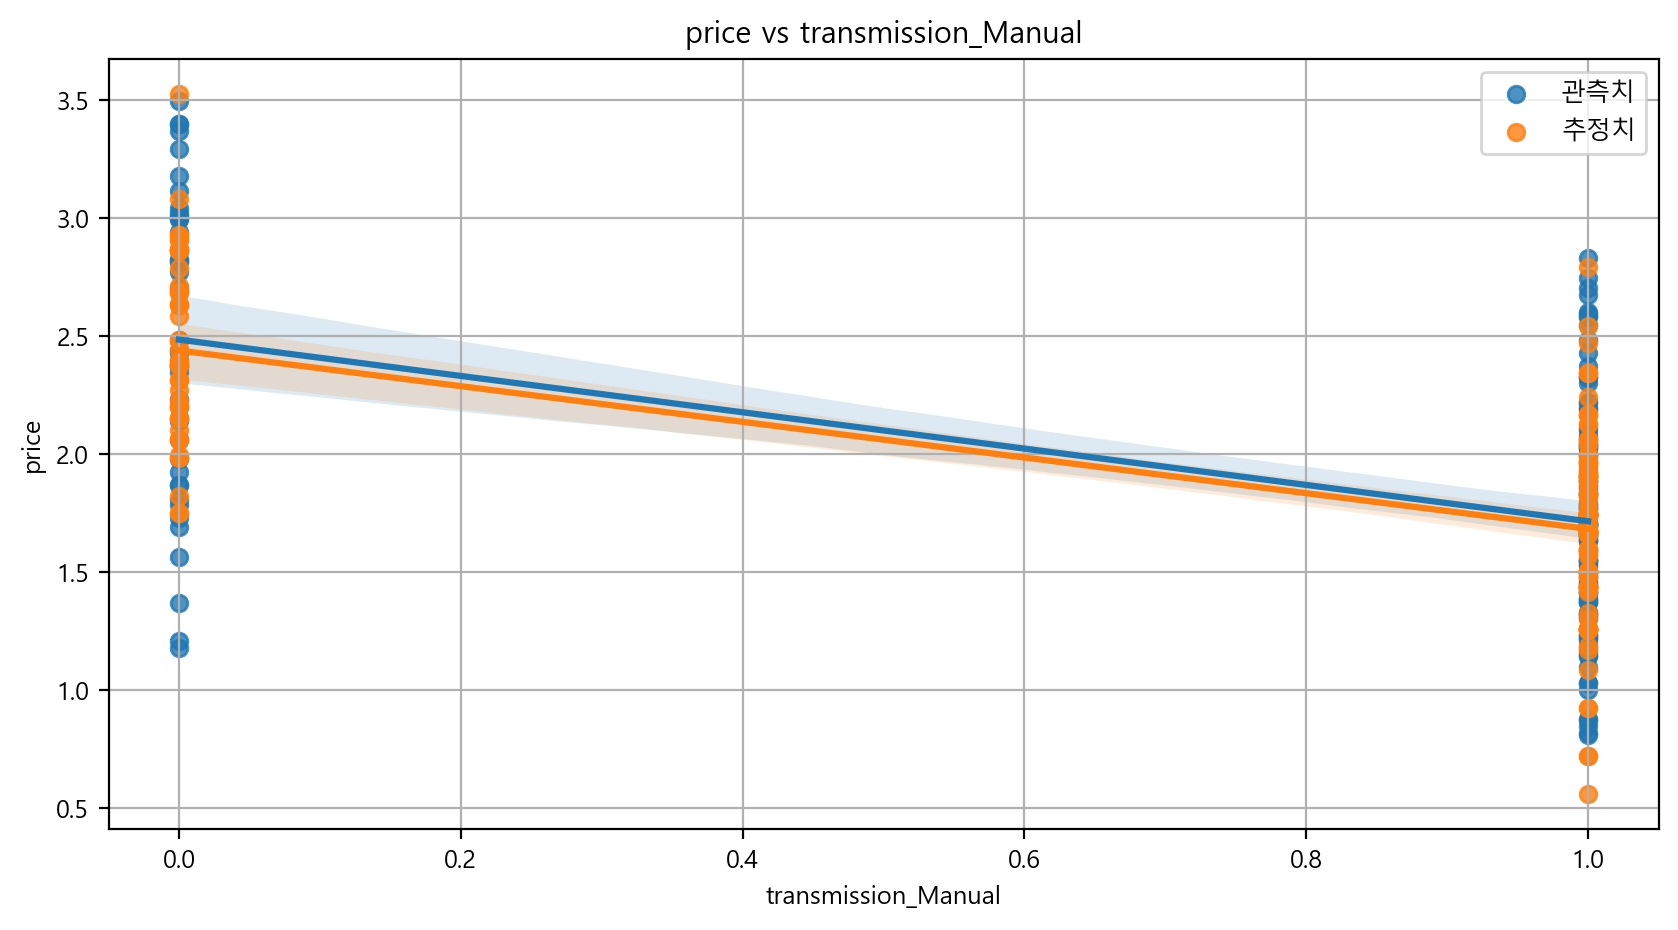



[잔차의 가정 확인] ==============================
[잔차의 선형성 가정]


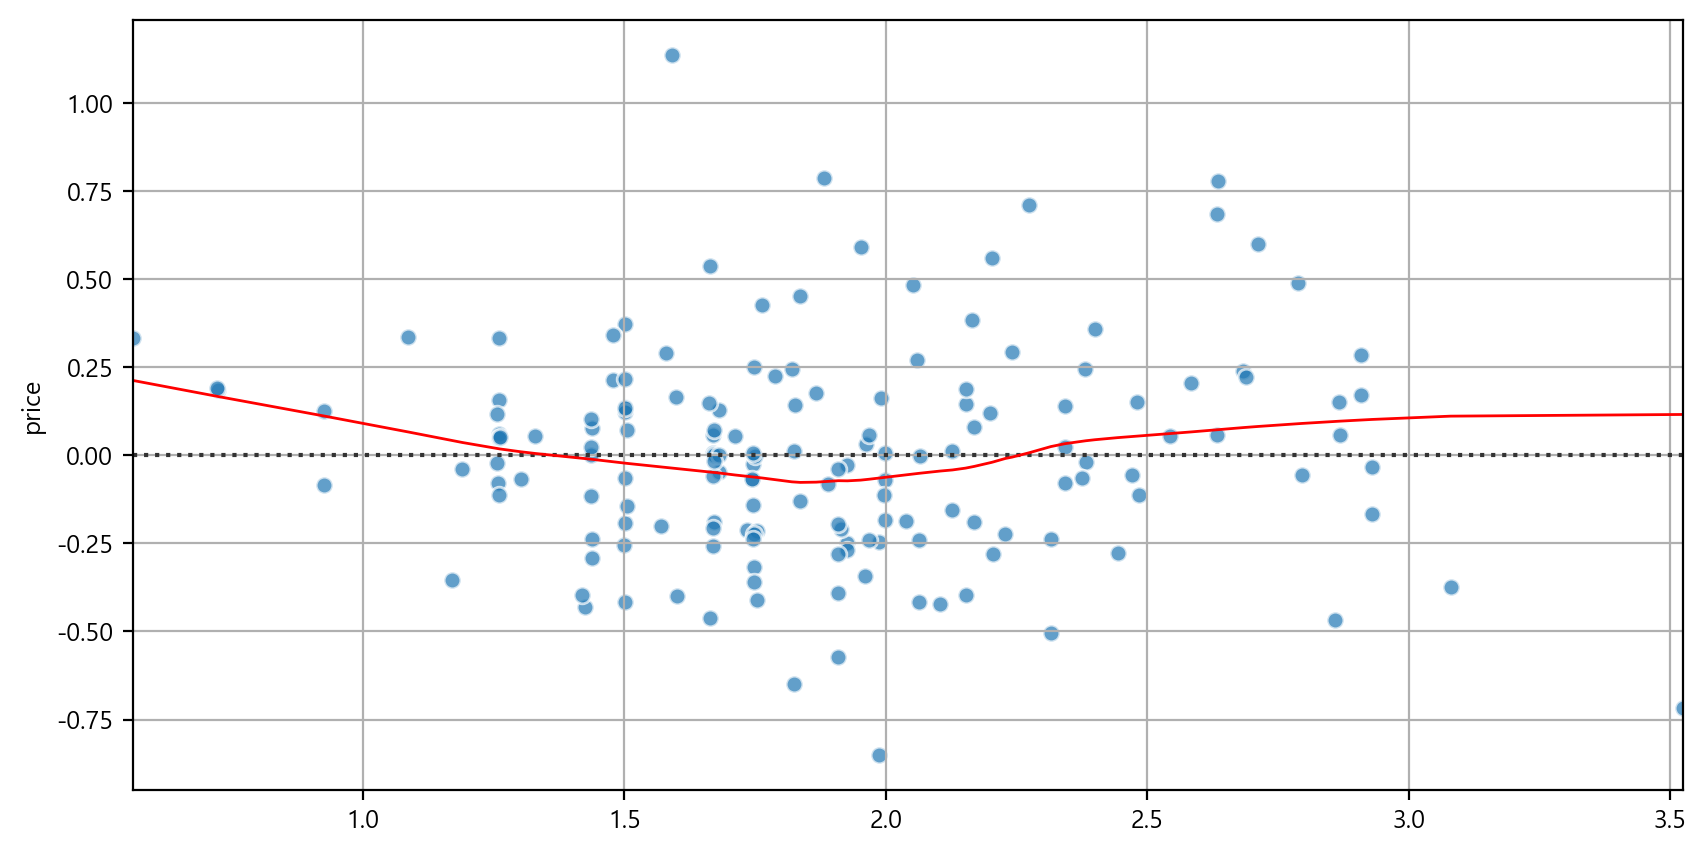


[잔차의 정규성 가정]


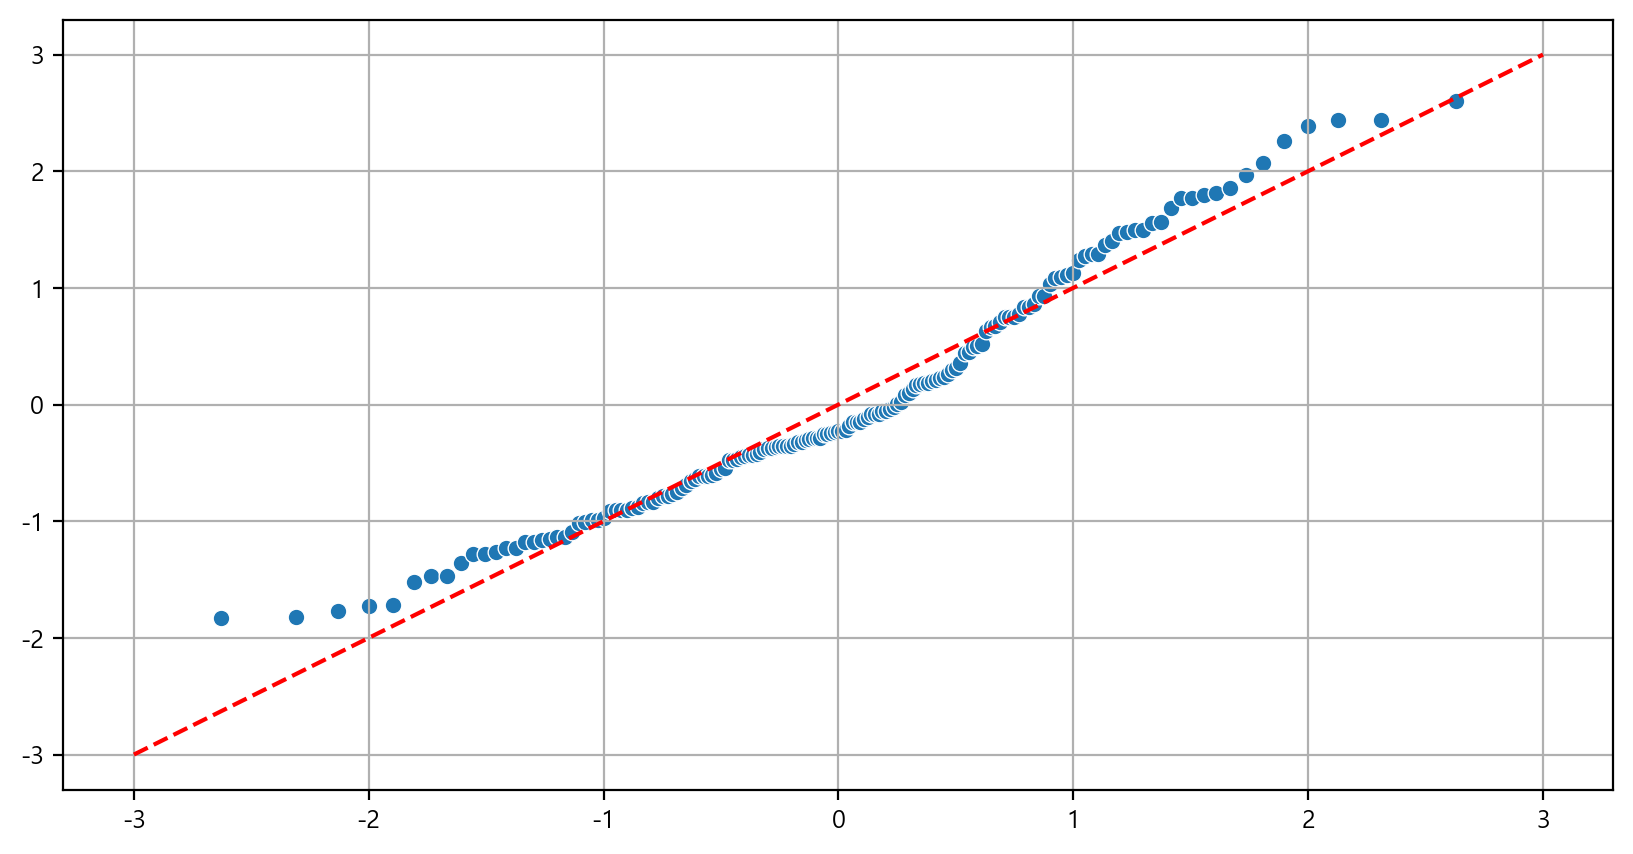

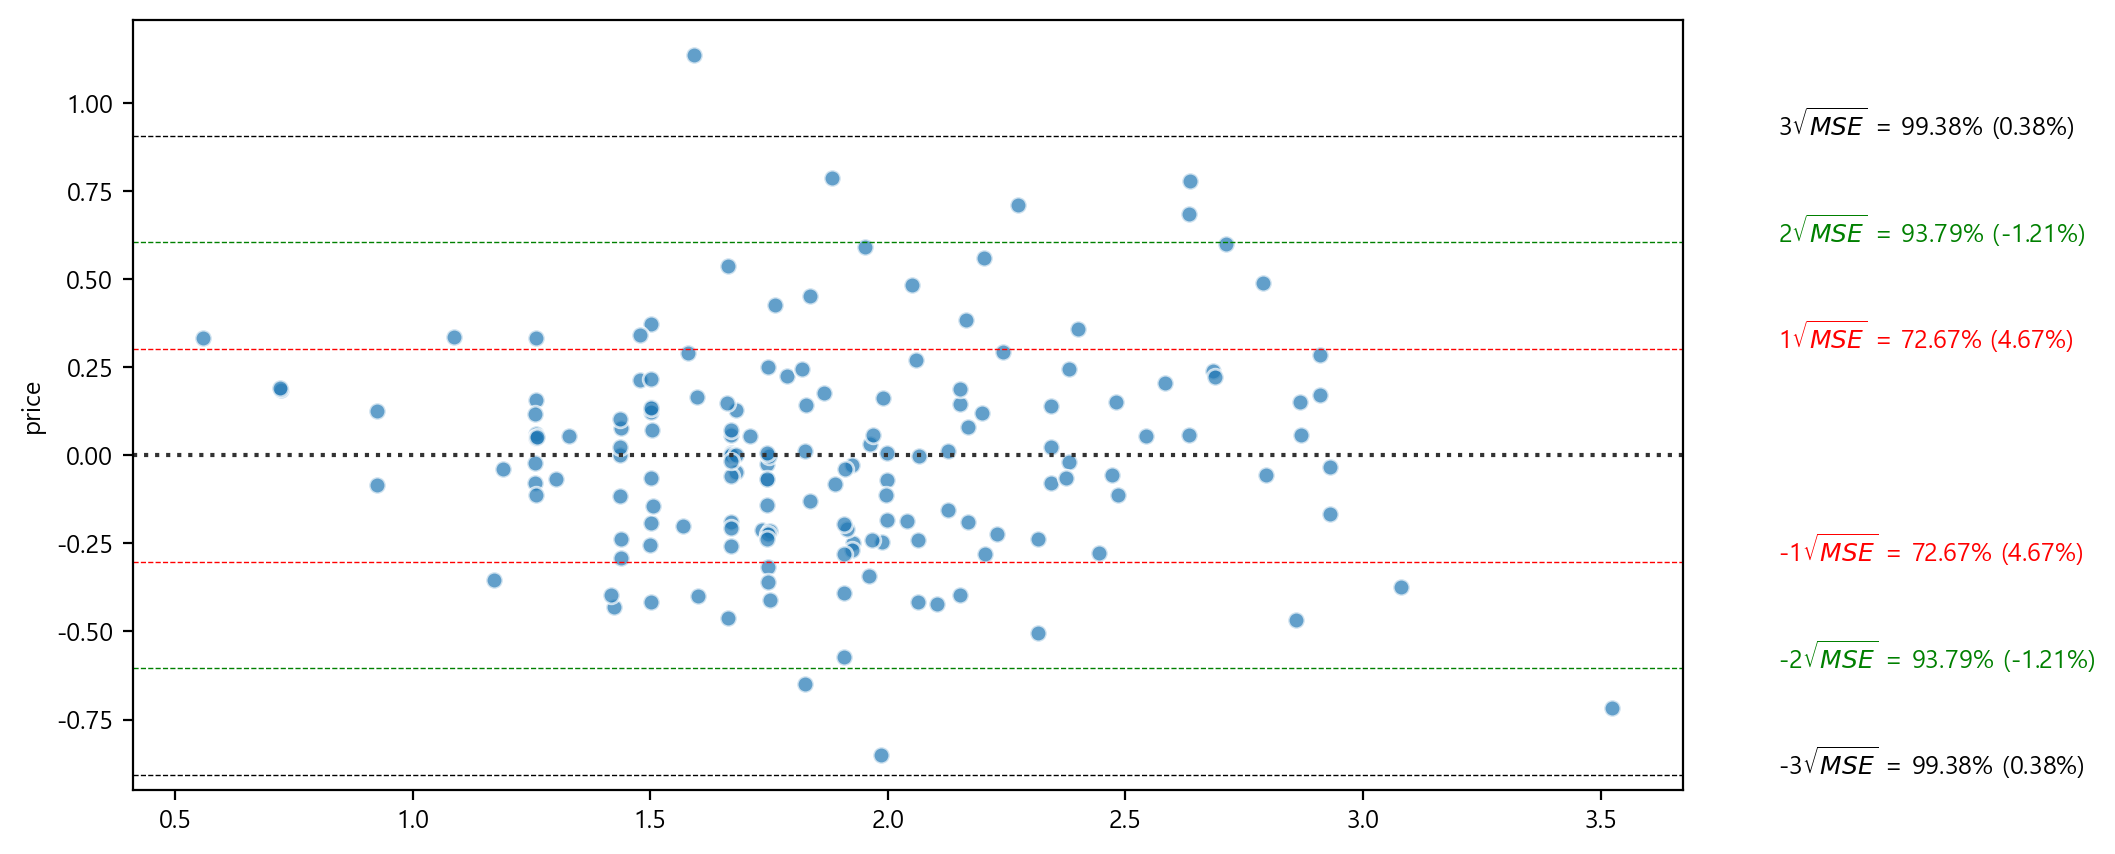

루트 1MSE 구간에 포함된 잔차 비율: 72.67% (4.67080745341616)
루트 2MSE 구간에 포함된 잔차 비율: 93.79% (-1.2111801242236027)
루트 3MSE 구간에 포함된 잔차 비율: 99.38% (0.3788819875776426)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: False
+-----------+-------------+
|           |      values |
|-----------+-------------|
| statistic |     48.6023 |
| p-value   | 2.03244e-05 |
| f-value   |     4.50946 |
| f p-value | 1.03855e-06 |
+-----------+-------------+

[잔차의 독립성 가정]
Durbin-Watson: 2.1025924502605955, 잔차의 독립성 가정 만족 여부: True


LinearRegression(n_jobs=-1)

In [32]:
# 통계적으로 유의하지 않은 변수 제거

ignore = ['mileage(kmpl)','kms_driven','torque(Nm)']
x_train2 = x_train.drop(ignore, axis=1)
x_test2 = x_test.drop(ignore, axis=1)
my_linear_regrassion(x_train2, y_train, x_test2, y_test, use_plot=True,resid_test=True)